Lets evaluate the applicability of K nearest neighbour with the curse of dimensionality. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist
import seaborn as sns

In [10]:
# Function to generate data samples 
# This function takes two inputs which include samples and dimensions. 
# This function will help you generate data of any dimension.
def generate_data(samples,dims):
  class_1_data = np.random.normal(0,1,(samples,dims))
  class_2_data = np.random.normal(3,1,(samples,dims))
  data = np.concatenate([class_1_data,class_2_data], axis = 0)

  # normalising the data
  data = (data-data.mean(axis = 0))/ data.std(axis = 0)
  return data, cdist(data,data, metric = 'euclidean')

[[-0.9008894 ]
 [-0.8736107 ]
 [-1.51958286]
 [-0.38216146]
 [-0.84874461]]


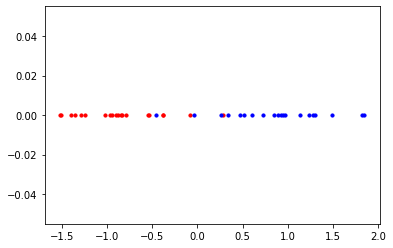

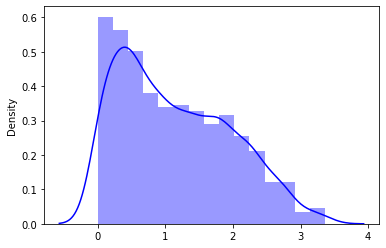

In [11]:
# Generate 1 dimensional data 
# Form the below histogram we can realise that the points are not very far away from each other. 
samples = 20 

data, distances = generate_data(samples,1)
print(data[:5])
plt.scatter(data[:samples],[0]*samples, s = 10, color = 'r')
plt.scatter(data[samples:],[0]*samples, s = 10, color = 'b')
plt.show()
sns.distplot(distances, hist = True, kde = True, color = 'b')
plt.show()

[[-0.36214859  0.57710055]
 [-1.04710813 -1.80691168]
 [-1.03303305 -0.4319114 ]
 [-0.87734928 -0.62911342]
 [-1.5532512  -0.92554423]]


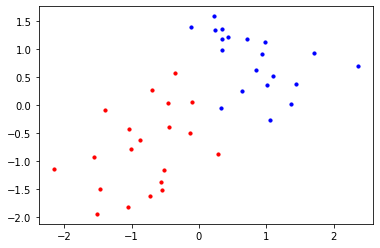

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


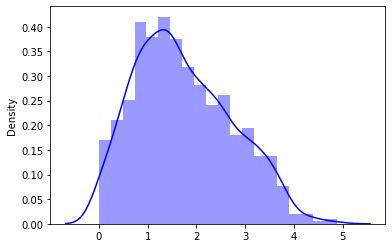

In [17]:
# Generate 2 dimensional data 
# Form the below histogram we can realise that the points are not very far away from each other. 
samples = 20 

data, distances = generate_data(samples,2)
print(data[:5])
plt.scatter(data[:samples,0],data[:samples,1], s = 10, color = 'r')
plt.scatter(data[samples:,0],data[samples:,1], s = 10, color = 'b')
plt.show()
sns.distplot(distances, hist = True, kde = True, color = 'b')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


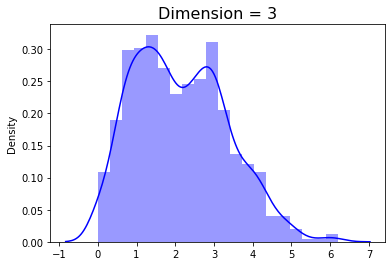

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


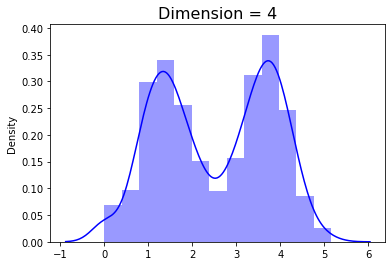

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


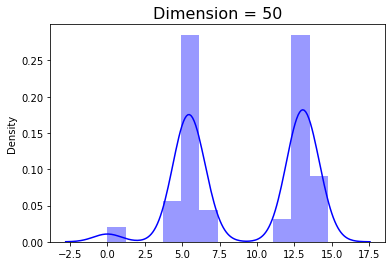

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


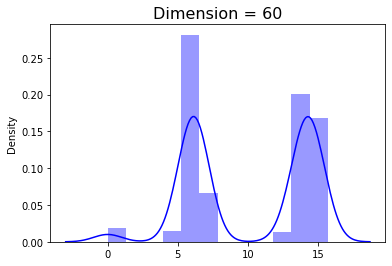

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


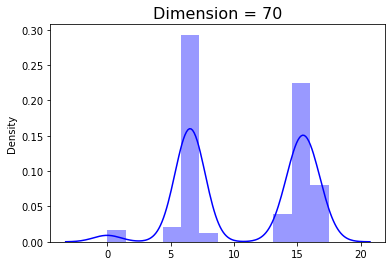

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


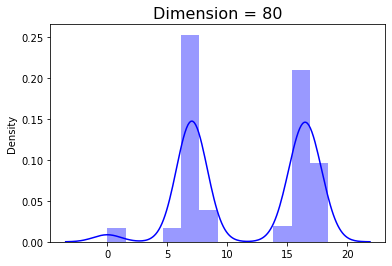

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


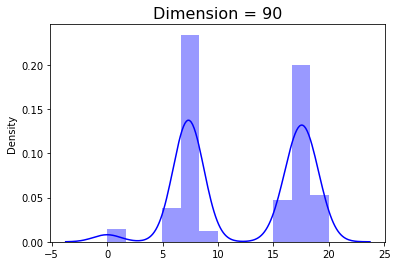

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


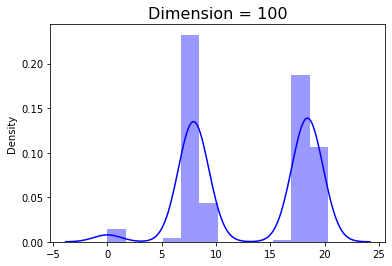

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


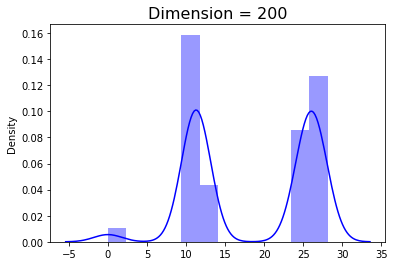

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


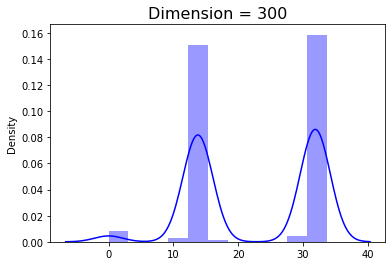

In [18]:
# Lets see what happens with increasing dimensions
for dim in list(range(3,5))+list(range(50,110,10)) + [100*i for i in range(2,4)]:
  _,distances = generate_data(samples,dim)
  sns.distplot(distances, hist = True, kde = True, color = 'b')
  plt.title('Dimension = %s'%dim, fontsize = 16)
  plt.show()

Another perspective : How many samples needed 

Let's assume we want 10 samples per unique combination of variables to train our model better. For simplicity lets consider that we have all features as binary variables. 

For 1 binary variable .... 2 unique combinations ... we need 20 samples
2 binary variables .... 4 unique combinations.... we need 40 samples

..

for n binary variables... 2^(n) unique combinations.... we need 10 * 2^(n) samples 


This number will be very huge for dimensions like n = 100 



In [19]:
k_values = np.arange(1,21)
samples_needed = 10*2**k_values

Text(1, 9000000.0, '10 Million')

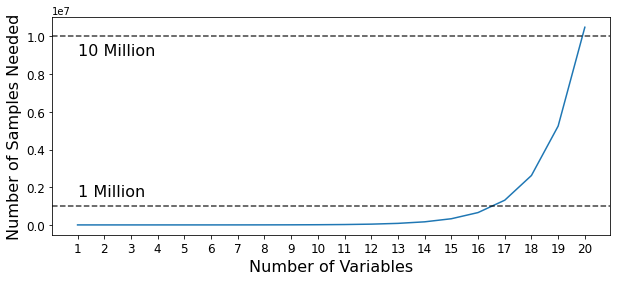

In [20]:
plt.figure(figsize= (10,4))
plt.plot(k_values,samples_needed)
plt.xlabel('Number of Variables', fontsize = 16)
plt.ylabel('Number of Samples Needed', fontsize = 16)
plt.xticks(k_values, fontsize = 12)
plt.yticks(np.arange(0,1.2*10**7,.2*10**7), fontsize = 12)
plt.axhline(10**6, linestyle = '--', color = 'k', alpha = 0.75)
plt.annotate('1 Million', (1,.15*10**7), fontsize = 16)
plt.axhline(10**7, linestyle = '--', color = 'k', alpha = 0.75)
plt.annotate('10 Million', (1,.9*10**7), fontsize = 16)